In [20]:
#Import library
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
# Some configs
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['font.size'] = 13

In [22]:
# Load data
df = pd.read_csv('./data/Salaries.csv')
x = df.drop('Salary_more_than_100k', axis='columns')
y = df['Salary_more_than_100k']

In [23]:
# Preprocessing data
from sklearn.preprocessing import LabelEncoder
x['Company_n'] = LabelEncoder().fit_transform(x['Company'])
x['Job_n'] = LabelEncoder().fit_transform(x['Job'])
x['Degree_n'] = LabelEncoder().fit_transform(x['Degree'])
x_n = x.drop(['Company', 'Job', 'Degree'], axis='columns')

In [45]:
# Create model
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
# model = DecisionTreeClassifier(criterion='gini', random_state=10).fit(x_n, y)
model = DecisionTreeClassifier(criterion='entropy', random_state=10).fit(x_n, y)
# Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

In [46]:
score = model.score(x_n, y)


In [47]:
# Visualize results
features = ['Company', 'Job', 'Degree']
text_representation = tree.export_text(model, feature_names=features)
print(text_representation)

|--- Company <= 0.50
|   |--- Job <= 0.50
|   |   |--- Degree <= 0.50
|   |   |   |--- class: 0
|   |   |--- Degree >  0.50
|   |   |   |--- class: 1
|   |--- Job >  0.50
|   |   |--- class: 0
|--- Company >  0.50
|   |--- Company <= 1.50
|   |   |--- class: 1
|   |--- Company >  1.50
|   |   |--- Job <= 0.50
|   |   |   |--- class: 1
|   |   |--- Job >  0.50
|   |   |   |--- Degree <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Degree >  0.50
|   |   |   |   |--- Job <= 1.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Job >  1.50
|   |   |   |   |   |--- class: 0



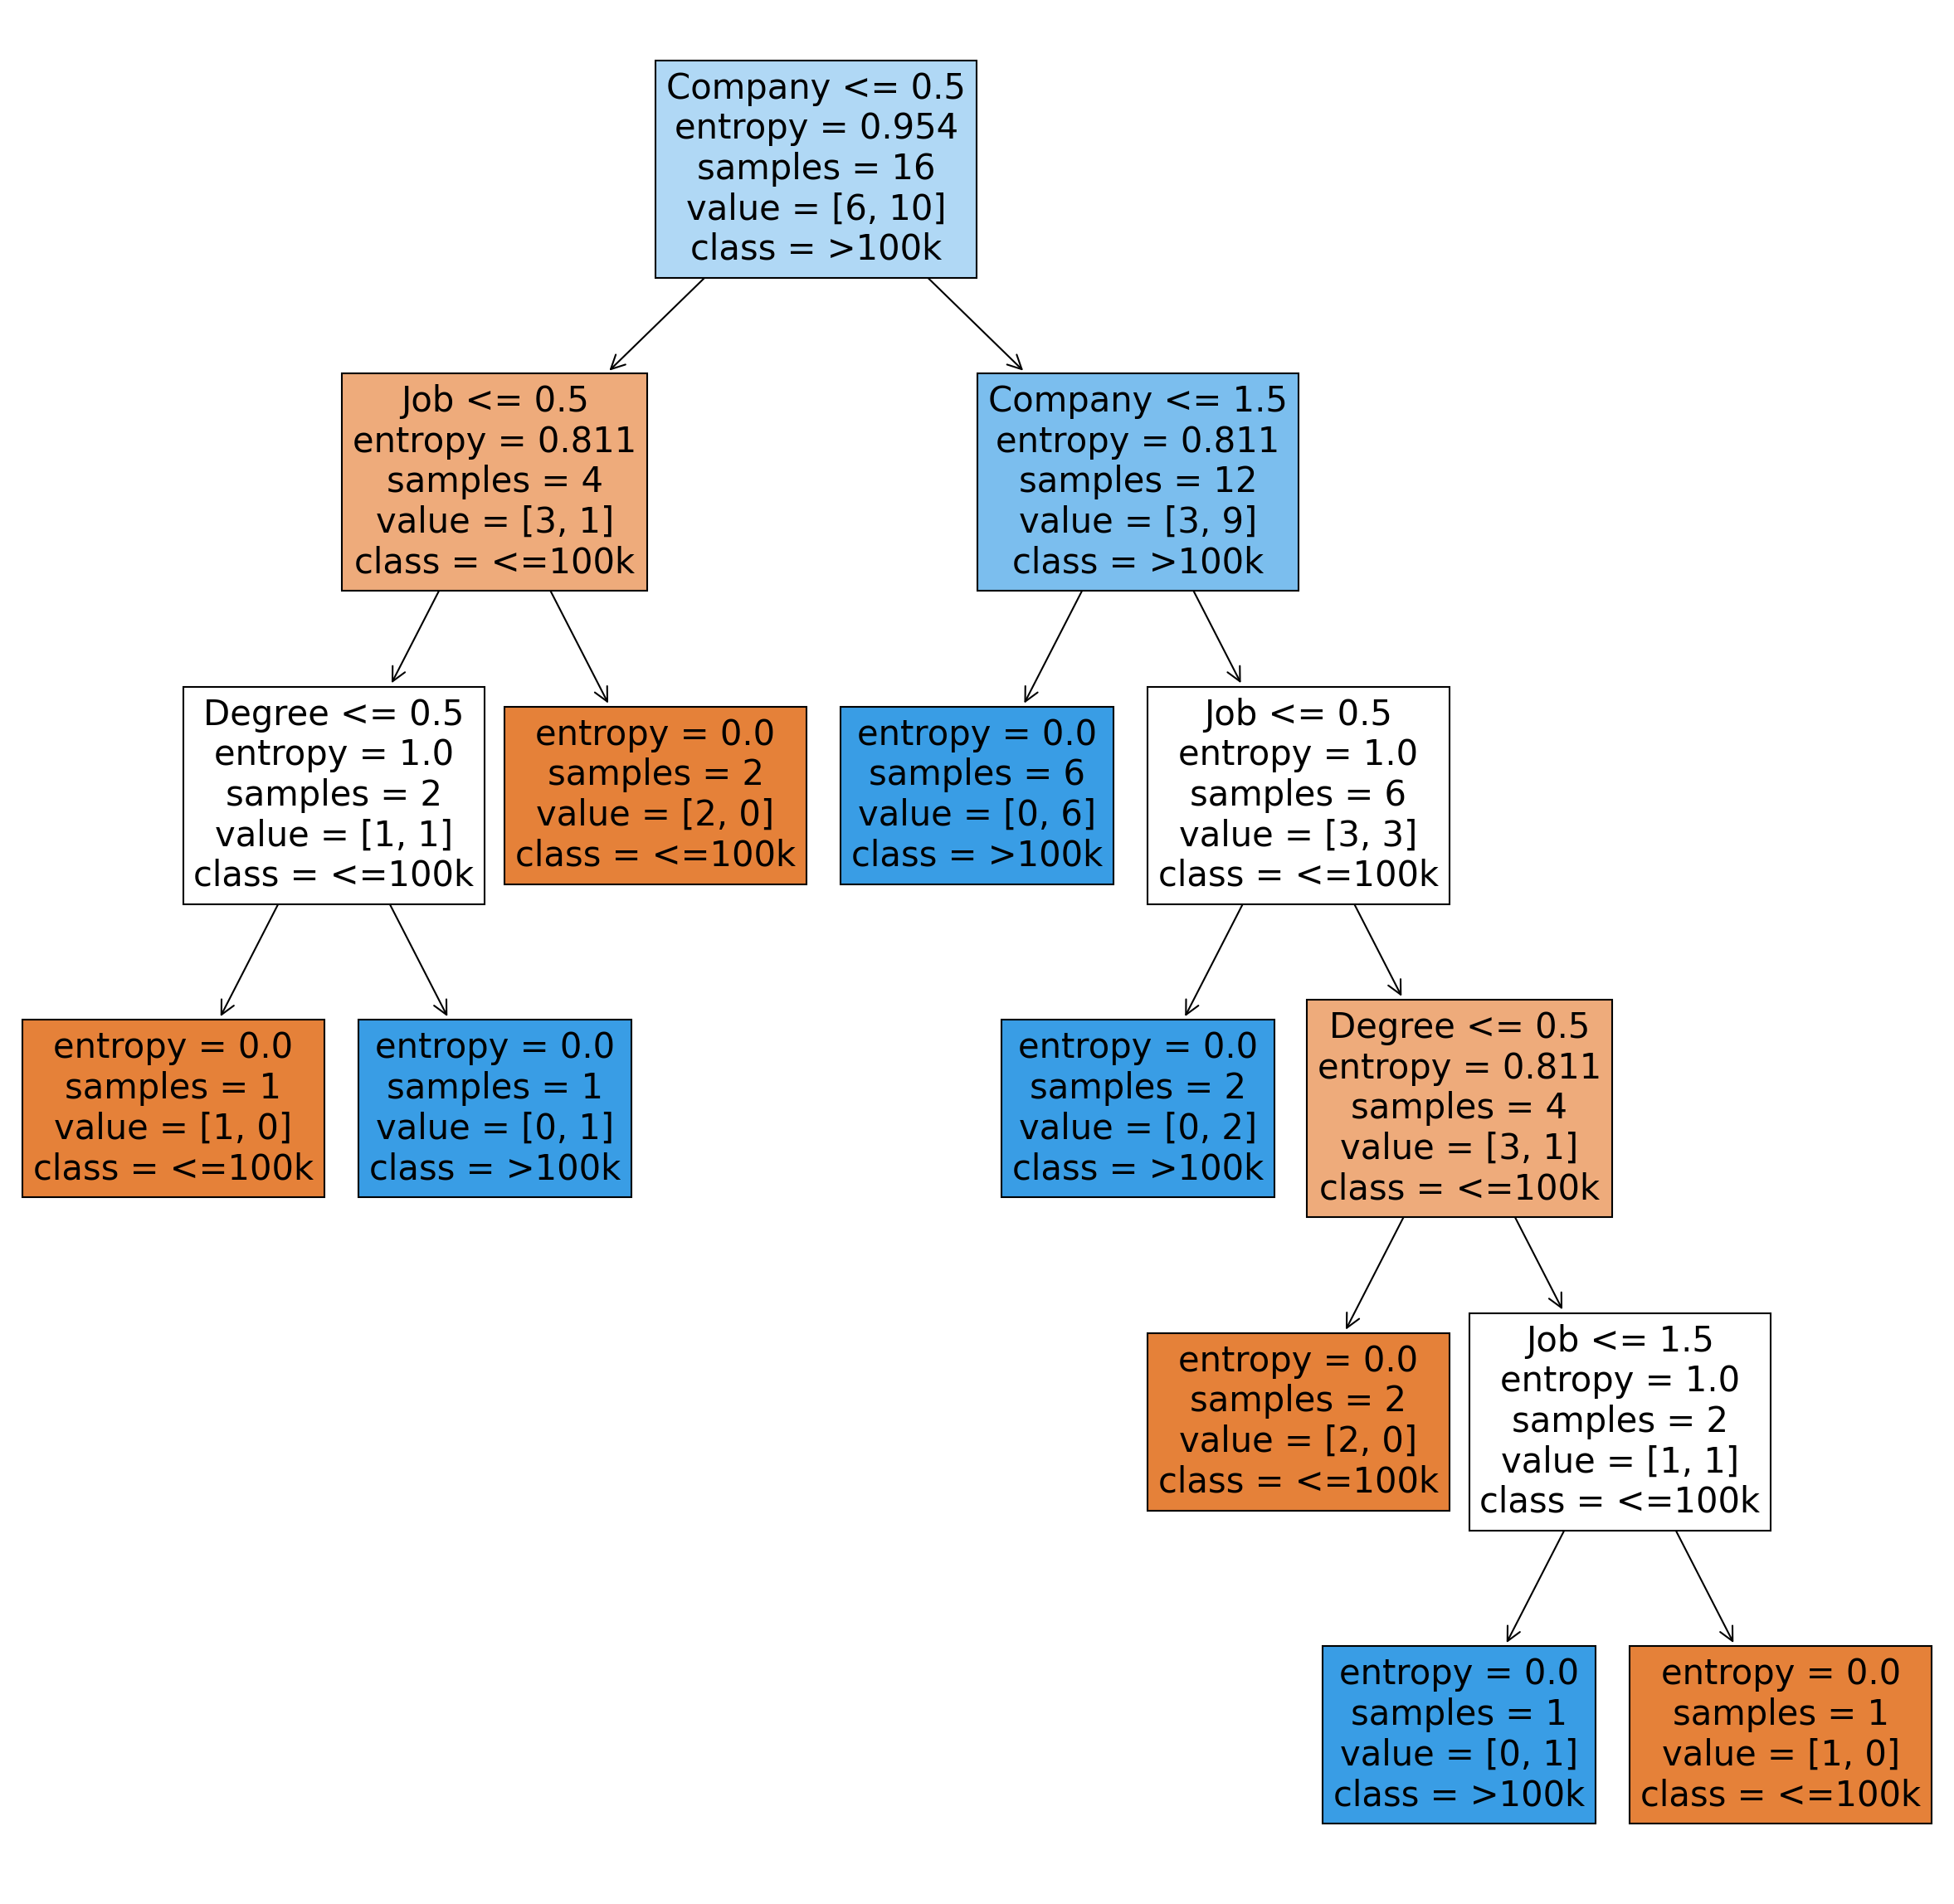

In [48]:
plt.figure(figsize=(20,20), dpi=150)
t = tree.plot_tree(model, feature_names=features, class_names=['<=100k', '>100k'], filled=True)

In [27]:
# Prediction
#Is salary of Google, Computer Engineer, Bachelors degree > 100 k ?
y_pre = model.predict([[2, 1, 1]])
